In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline


import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [10,4]
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['savefig.dpi'] = 200

mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth']= 2.0

In [2]:
def global_mean_2D(var, weights):
    # assumes 2D field as var input

    # make sure masking is correct, otherwise we get nans
    var = np.ma.masked_invalid(var)
    
    # resulting variable should have dimensions of depth and time (x)
    ave = np.zeros(var.shape[0])

    # loop over time
    for t in np.arange(var.shape[0]):
        ave[t] = np.ma.average(var[t,:,:], weights = weights)
    return ave

# function to take global weighted mean, keeping depth information
def global_mean_3D(var, weights):
    # make sure masking is correct, otherwise we get nans
    var = np.ma.masked_invalid(var)
    
    # resulting variable should have dimensions of depth and time (x)
    ave = np.zeros([var.shape[0], var.shape[1]])

    # loop over time
    for t in np.arange(var.shape[0]):
    # loop over each depth slice
        for d in np.arange(var.shape[1]):
            ave[t,d] = np.ma.average(var[t,d,:,:], weights = weights)
    return ave

#make annual means from monthly timeseries, starting in June

#assumes data starts in january

def annual_mean_june(var,nyears):
    var_annual = np.zeros((nyears))
    for y in range(0,nyears):
        var_annual[y] = var[(y*12+6):(y*12+18)].mean()
        
    return var_annual

In [66]:
path = '/glade/u/home/chsharri/Work/NW/'

mask = xr.open_dataset('/glade/u/home/chsharri/Work/NW/region_mask_nw.nc')

temp_5 = xr.open_dataset(path+'nw_targets_01.pop.h.TEMP.nc')
temp_27 = xr.open_dataset(path+'nw_targets_02.pop.h.TEMP.nc')
temp_37 = xr.open_dataset(path+'nw_targets_03.pop.h.TEMP.nc')
temp_16 = xr.open_dataset(path+'nw_targets_04.pop.h.TEMP.nc')
temp_47 = xr.open_dataset(path+'nw_targets_05.pop.h.TEMP.nc')
temp_150 = xr.open_dataset(path+'nw_ur_150_07.pop.h.TEMP.nc')

#CONTROLS
temp_cntrl_1 = xr.open_dataset(path+'nw_cntrl_03.pop.h.TEMP.nc') # 25.5 years = 306
#temp_cntrl_2 = xr.open_dataset(path+'nw_cntrl_03m02.pop.h.TEMP.nc') # 20 years = 240 mo
#temp_cntrl_3 = xr.open_dataset(path+'nw_cntrl_03m03.pop.h.TEMP.nc') # 19 years = 228

In [188]:
t_cntrl_1_global_mo = global_mean_2D(temp_cntrl_1.TEMP[12*4:,10,:,:], mask.TAREA)
#t_cntrl_2_global_mo = global_mean_2D(temp_cntrl_2.TEMP[12*4:234,20,:,:], mask.TAREA)
#t_cntrl_3_global_mo = global_mean_2D(temp_cntrl_3.TEMP[12*4:234,20,:,:], mask.TAREA)
full_control = (t_cntrl_1_global_mo)# + t_cntrl_2_global_mo + t_cntrl_2_global_mo)/3

In [189]:
t_5_global_mo = global_mean_2D(temp_5.TEMP[:,10,:,:], mask.TAREA)
t_27_global_mo = global_mean_2D(temp_27.TEMP[:,10,:,:], mask.TAREA)
t_37_global_mo = global_mean_2D(temp_37.TEMP[:,10,:,:], mask.TAREA)
t_16_global_mo = global_mean_2D(temp_16.TEMP[:,10,:,:], mask.TAREA)
t_47_global_mo = global_mean_2D(temp_47.TEMP[:,10,:,:], mask.TAREA)
t_150_global_mo = global_mean_2D(temp_150.TEMP[:,10,:,:], mask.TAREA)

In [190]:
len(full_control)

258

In [191]:
t_5_global_yr = annual_mean_june(t_5_global_mo, 15)
t_27_global_yr = annual_mean_june(t_27_global_mo, 15)
t_37_global_yr = annual_mean_june(t_37_global_mo, 15)
t_16_global_yr = annual_mean_june(t_16_global_mo, 15)
t_47_global_yr = annual_mean_june(t_47_global_mo, 15)
#sst_150_global_yr = annual_mean_june(sst_150_global_mo, 15) #truncated version
t_150_global_yr = annual_mean_june(t_150_global_mo, 30) #full version
                                    
#control_pre_annual = annual_mean_june(t_control_pre,2)
full_control_annual= annual_mean_june(full_control,21)      

In [192]:
#t_5_global_yr = np.append(control_pre_annual,  t_5_global_yr)
#t_27_global_yr = np.append(control_pre_annual, t_27_global_yr)
#t_37_global_yr = np.append(control_pre_annual, t_37_global_yr)
#t_16_global_yr = np.append(control_pre_annual, t_16_global_yr)
#t_47_global_yr = np.append(control_pre_annual, t_47_global_yr)
#t_150_global_yr = np.append(control_pre_annual,t_150_global_yr)

In [193]:
t_150_global_yr

array([14.39480893, 12.84332212, 11.87864359, 11.34101486, 11.0674533 ,
       10.96257035, 11.0164326 , 11.30726306, 11.76238815, 12.32252304,
       12.90511362, 13.25423193, 13.43687646, 13.57505337, 13.68500884,
       13.76261393, 13.81472842, 13.89179238, 13.99734298, 13.97911183,
       14.01532038, 14.04297034, 14.07911515, 14.1113259 , 14.14842049,
       14.15812635, 14.16450016, 14.19589353, 14.25795738, 14.26245054])

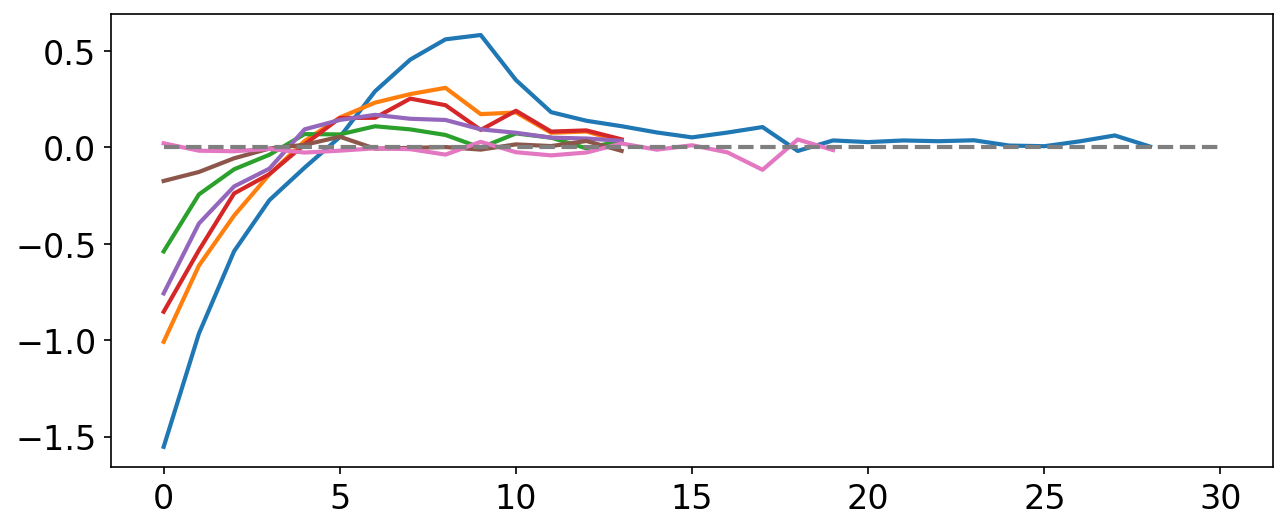

In [194]:
##Second one##

dt_150 = []
dt_47 = []
dt_16 = []
dt_37 = []
dt_27 = []
dt_5 = []

dt_cont = []
for i in range(0,len(t_150_global_yr)-1):
    avg = (t_150_global_yr[i+1] - t_150_global_yr[i])/((i+1)-i)
    dt_150.append(avg)
for i in range(0,len(t_47_global_yr)-1):
    avg = (t_47_global_yr[i+1] - t_47_global_yr[i])/((i+1)-i)
    dt_47.append(avg)
    
    avg = (t_16_global_yr[i+1] - t_16_global_yr[i])/((i+1)-i)
    dt_16.append(avg)

    avg = (t_37_global_yr[i+1] - t_37_global_yr[i])/((i+1)-i)
    dt_37.append(avg)
    
    avg = (t_27_global_yr[i+1] - t_27_global_yr[i])/((i+1)-i)
    dt_27.append(avg)
    
    
    avg = (t_5_global_yr[i+1] - t_5_global_yr[i])/((i+1)-i)
    dt_5.append(avg)
for i in range(0,len(full_control_annual)-1):
    avg = (full_control_annual[i+1] - full_control_annual[i])/((i+1)-i)
    dt_cont.append(avg)
plt.plot(dt_150) 
plt.plot(dt_47)
plt.plot(dt_16)
plt.plot(dt_37)
plt.plot(dt_27)
plt.plot(dt_5) 
plt.plot(dt_cont)
plt.plot([0, 30], [0, 0], '--')

In [195]:
dates_com = pd.date_range(start = '01/31/2021', end = '12/31/2034', freq='y')
dates_full = pd.date_range(start = '01/31/2021', end = '12/31/2049', freq='y')
dates_cont = pd.date_range(start = '01/31/2021', end = '12/31/2040', freq='y')

In [196]:
dates_cont[len(dates_cont)-1-10:-1 ]

DatetimeIndex(['2030-12-31', '2031-12-31', '2032-12-31', '2033-12-31',
               '2034-12-31', '2035-12-31', '2036-12-31', '2037-12-31',
               '2038-12-31', '2039-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [197]:
dates_full[9:19]

DatetimeIndex(['2030-12-31', '2031-12-31', '2032-12-31', '2033-12-31',
               '2034-12-31', '2035-12-31', '2036-12-31', '2037-12-31',
               '2038-12-31', '2039-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [198]:
long_Control_5Yr_mean= np.mean(dt_cont[len(dates_cont)-1-10:-1 ])
corresponding_150_mean = np.mean(dt_150[9:19])

In [199]:
np.mean(full_control_annual[-10:])

14.965013146400452

In [200]:
long_Control_5Yr_mean

-0.014328813552856446

In [201]:
corresponding_150_mean

0.16565887928009032

In [202]:
dates_full[-10:]

DatetimeIndex(['2040-12-31', '2041-12-31', '2042-12-31', '2043-12-31',
               '2044-12-31', '2045-12-31', '2046-12-31', '2047-12-31',
               '2048-12-31', '2049-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [203]:
last_10Yr_150_mean = np.mean(dt_150[-10:])

In [204]:
last_10Yr_150_mean

0.028333870569865027

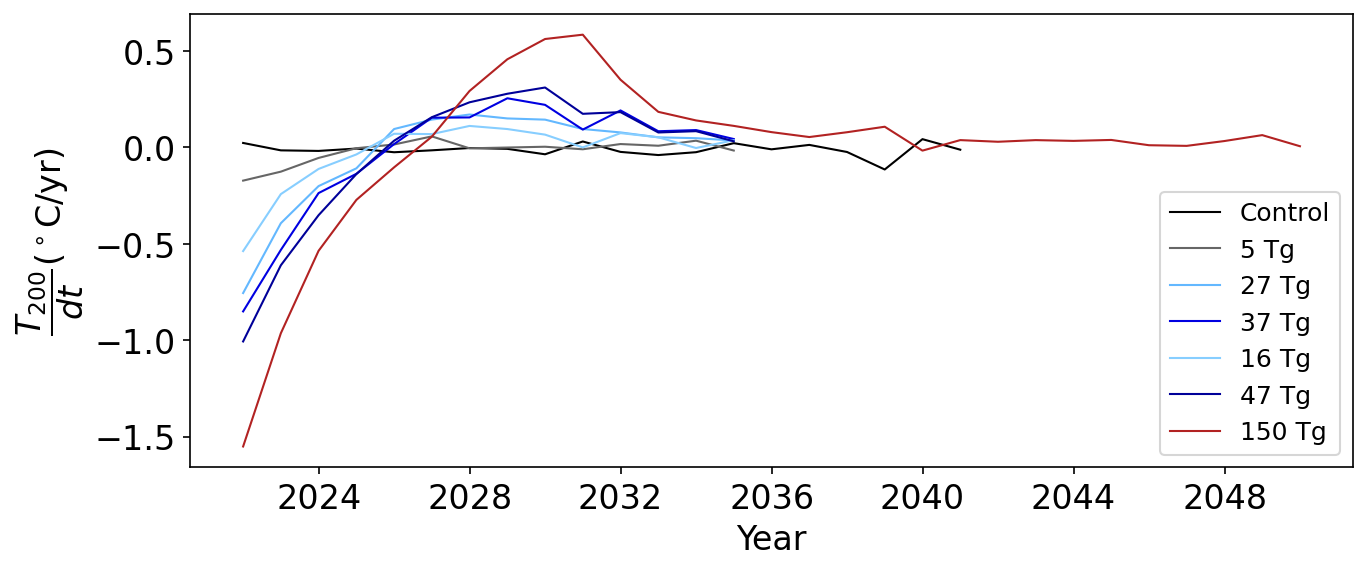

In [205]:
fig= plt.figure(figsize=(10,4), facecolor='w')

plt.plot(dates_cont,dt_cont,color = 'k', linewidth = 1, label = 'Control')
plt.plot(dates_com,dt_5,color = '#666666', linewidth = 1, label = '5 Tg')
plt.plot(dates_com,dt_27,color = '#63b8ff', linewidth = 1, label = '27 Tg')
plt.plot(dates_com,dt_37,color = '#0000e1', linewidth = 1, label = '37 Tg')
plt.plot(dates_com,dt_16,color = '#87ceff', linewidth = 1, label = '16 Tg')
plt.plot(dates_com,dt_47,color = '#000099', linewidth = 1, label = '47 Tg')
plt.plot(dates_full,dt_150,color = '#b22222', linewidth = 1, label = '150 Tg')

plt.legend( loc='lower right',fontsize = '12')

plt.xlabel('Year')
plt.ylabel('$\dfrac{T_{200}}{dt}$($^\circ$C/yr)')

#plt.ylabel('$\dfrac{NO3}{dt}$($mmol/m^3$)')

plt.show() 

NameError: name 'dt' is not defined

In [ ]:
plt.plot(t_150_global_yr)